In [14]:
#installing essential dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [15]:
#Reading the dataset into a Data Frame
df=pd.read_csv('NFLX.csv')

In [16]:
# reading the first 5 rows of the data set
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [17]:
# checking the data shape (we observe we have 1007 rows of data and 7 columns)
df.shape

(1007, 7)

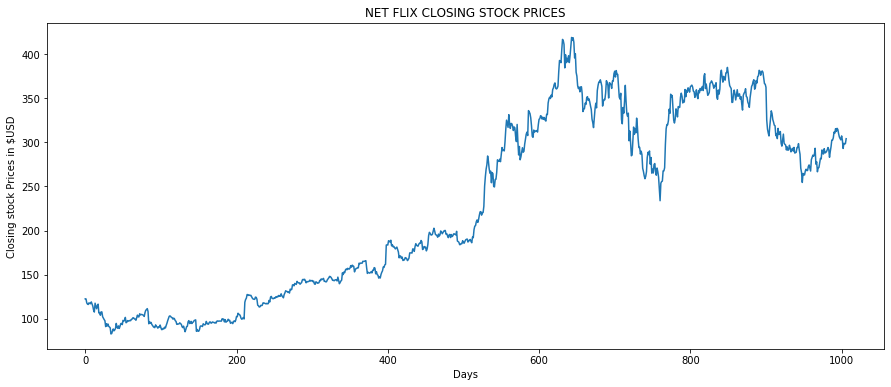

In [21]:
plt.figure(figsize=(15,6))
plt.title("NET FLIX CLOSING STOCK PRICES")
plt.xlabel("Days")
plt.ylabel("Closing stock Prices in $USD")
plt.plot(df['Close'])
plt.show()

In [26]:
# We wish to forecast 30 days into the future,so we create a variable called future_days to hold the number of days
future_days=30
df['Prediction']=df[['Close']].shift(-future_days)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000,94.089996
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900,91.489998
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100,90.739998
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000,89.709999
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000,82.790001


In [28]:
df=df[['Close','Prediction']]
df.head()

,Close,Prediction
0,122.639999,94.089996
1,122.510002,91.489998
2,118.019997,90.739998
3,116.629997,89.709999
4,116.239998,82.790001


In [29]:
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [35]:
Y=np.array(df['Prediction'])[:-future_days]
print(Y)

[ 94.089996  91.489998  90.739998  89.709999  82.790001  83.32
  86.129997  88.449997  86.349998  87.400002  89.050003  94.760002
  90.489998  89.230003  91.93      89.120003  91.610001  94.529999
  94.790001  93.410004  98.300003  97.610001  97.93     101.580002
  95.489998  96.230003  98.        97.360001  97.660004  98.129997
  97.860001  99.349998  99.720001 101.120003 101.059998  99.839996
  99.589996  98.360001 101.209999 104.129997 102.190002 102.230003
 105.699997 104.349998 104.940002 104.830002 104.449997 103.809998
 102.68     106.980003 109.650002 110.419998 111.510002 108.400002
  94.339996  96.769997  94.980003  95.900002  93.559998  92.43
  91.040001  90.279999  90.029999  93.110001  91.540001  90.790001
  89.370003  90.839996  90.540001  92.889999  90.019997  87.739998
  87.879997  89.120003  88.629997  90.5       89.550003  92.489998
  94.889999  97.889999 100.199997 102.809998 103.300003 102.57
 101.510002 101.25      99.589996 100.739998  99.889999  97.860001
  97.08

In [31]:
#We split the data into training and testing data sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [62]:
#We create Models
#1.MODEL 1: Decision Tree Regressor model
#2:MODEL 2: Linear Regression Model

dec_tree=DecisionTreeRegressor()
dec_tree.fit(X,Y)
linreg=LinearRegression().fit(X,Y)

In [40]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
print(x_future)

[[265.920013]
 [254.589996]
 [264.75    ]
 [263.309998]
 [263.079987]
 [267.619995]
 [269.579987]
 [268.029999]
 [268.149994]
 [272.790009]
 [274.459991]
 [270.720001]
 [267.529999]
 [280.480011]
 [282.929993]
 [285.529999]
 [284.25    ]
 [286.279999]
 [293.350006]
 [275.299988]
 [278.049988]
 [266.690002]
 [271.269989]
 [271.5     ]
 [276.820007]
 [281.859985]
 [281.209991]
 [291.450012]
 [287.410004]
 [286.809998]]


In [63]:
tree_prediction=dec_tree.predict(x_future)
print(tree_prediction)
print()
linreg_prediction=linreg.predict(x_future)
print(linreg_prediction)

[292.859985 288.029999 288.589996 289.570007 291.570007 294.179993
 292.01001  283.109985 289.619995 295.029999 302.570007 302.600006
 305.160004 311.690002 310.480011 315.549988 312.48999  315.929993
 314.660004 309.98999  306.160004 304.320007 302.859985 307.350006
 302.5      293.119995 298.929993 298.440002 298.5      304.209991]

[269.13423063 258.52458925 268.03860842 266.69016341 266.47477678
 270.72612581 272.56149924 271.11006128 271.22242685 275.56742432
 277.13122693 273.62902983 270.64185186 282.76848708 285.06269638
 287.49739098 286.2987758  288.19970511 294.82019287 277.91781595
 280.49296776 269.85526284 274.14404895 274.35943559 279.34119037
 284.06072073 283.4520541  293.04100269 289.25786309 288.69600616]


D:\PROGRAM FILES\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


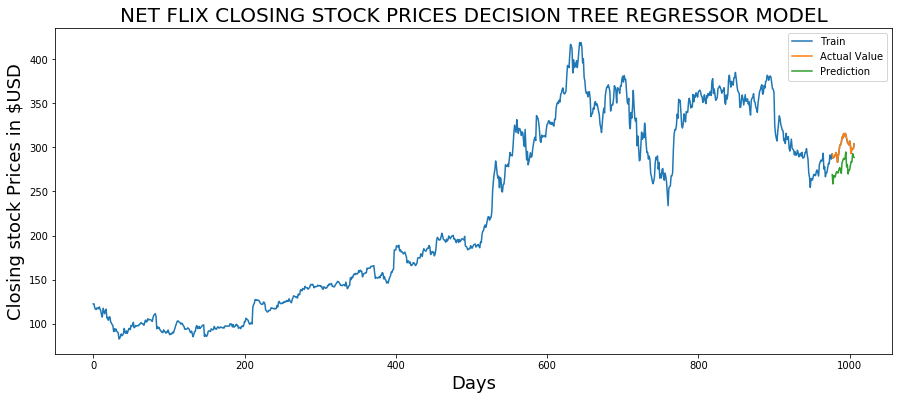

In [65]:
predictions=linreg_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(15,6))
plt.title("NET FLIX CLOSING STOCK PRICES REGRESSOR MODEL",fontsize =20 )
plt.xlabel("Days",fontsize=18)
plt.ylabel("Closing stock Prices in $USD",fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Actual Value','Prediction'])
plt.show()

D:\PROGRAM FILES\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


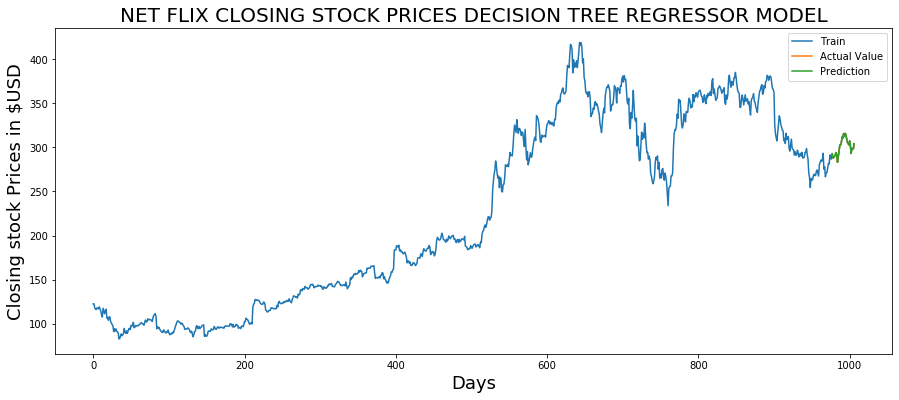

In [66]:
predictions=tree_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(15,6))
plt.title("NET FLIX CLOSING STOCK PRICES DECISION TREE REGRESSOR MODEL",fontsize =20 )
plt.xlabel("Days",fontsize=18)
plt.ylabel("Closing stock Prices in $USD",fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Actual Value','Prediction'])
plt.show()